In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm


import warnings
warnings.filterwarnings("ignore")

## 5 Year Breakeven Data

In [23]:
y5_BE = pd.read_csv("data/T5YIE.csv")
y5_BE.columns = ["Date", "5Y_Breakeven"]
y5_BE = y5_BE.set_index("Date")
y5_BE.index = pd.to_datetime(y5_BE.index)
y5_BE.head()

5Y_Breakeven
Date                    
2003-01-02          1.30
2003-01-03          1.28
2003-01-06          1.31
2003-01-07          1.28
2003-01-08          1.33

## Event Data

In [24]:
CPI_release = pd.read_excel("data/release_dates.xlsx")
CPI_release.columns = ["Date"]
CPI_release = CPI_release.set_index("Date")
CPI_release["CPI Release Date"] = True
CPI_release.index = pd.to_datetime(CPI_release.index)
CPI_release

CPI Release Date
Date                        
1949-03-24              True
1949-04-22              True
1949-05-23              True
1949-06-24              True
1949-07-22              True
...                      ...
2025-01-15              True
2025-02-12              True
2025-03-12              True
2025-04-10              True
2025-05-13              True

[935 rows x 1 columns]

In [25]:
UNR_release = pd.read_excel("data/release_dates_50.xlsx")
UNR_release.columns = ["Date"]
UNR_release = UNR_release.set_index("Date")
UNR_release["UNR Release Date"] = True
UNR_release.index = pd.to_datetime(UNR_release.index)
UNR_release

UNR Release Date
Date                        
1955-05-06              True
1955-06-07              True
1955-07-08              True
1955-08-09              True
1955-09-07              True
...                      ...
2025-01-10              True
2025-02-07              True
2025-03-07              True
2025-04-04              True
2025-05-02              True

[849 rows x 1 columns]

In [26]:
inflation_event = y5_BE.join(CPI_release)
inflation_event = inflation_event.fillna(False)
inflation_event["5Y_Breakeven_change"] = inflation_event["5Y_Breakeven"].diff()
inflation_event = inflation_event.dropna()
inflation_event.head()

5Y_Breakeven  CPI Release Date 5Y_Breakeven_change
Date                                                         
2003-01-03         1.28             False               -0.02
2003-01-06         1.31             False                0.03
2003-01-07         1.28             False               -0.03
2003-01-08         1.33             False                0.05
2003-01-09         1.41             False                0.08

In [27]:
event_data = inflation_event.join(UNR_release)
event_data = event_data.fillna(False)
event_data["Event Release Date"] = (event_data["UNR Release Date"] | event_data["CPI Release Date"])
event_data

5Y_Breakeven  CPI Release Date  5Y_Breakeven_change  \
Date                                                             
2003-01-03         1.28             False                -0.02   
2003-01-06         1.31             False                 0.03   
2003-01-07         1.28             False                -0.03   
2003-01-08         1.33             False                 0.05   
2003-01-09         1.41             False                 0.08   
...                 ...               ...                  ...   
2025-05-12         2.35             False                -0.04   
2025-05-13         2.38              True                 0.03   
2025-05-14         2.44             False                 0.06   
2025-05-15         2.41             False                -0.03   
2025-05-16         2.42             False                 0.01   

            UNR Release Date  Event Release Date  
Date                                              
2003-01-03             False               False  
2003-01-06             False               False  
2003-01-07             False               False  
2003-01-08             False               False  
2003-01-09             False               False  
...                      ...                 ...  
2025-05-12             False               False  
2025-05-13             False                True  
2025-05-14             False               False  
2025-05-15             False               False  
2025-05-16             False               False  

[5836 rows x 5 columns]

In [28]:
event_occ = event_data.loc[event_data["Event Release Date"]]
event_occ

5Y_Breakeven  CPI Release Date  5Y_Breakeven_change  \
Date                                                             
2003-01-10          1.4             False                -0.01   
2003-01-16          1.4              True                -0.01   
2003-02-07          1.6             False                -0.02   
2003-02-21         1.73              True                 0.04   
2003-03-07         1.74             False                 0.01   
...                 ...               ...                  ...   
2025-03-12         2.53              True                 0.03   
2025-04-04         2.34             False                -0.16   
2025-04-10         2.32              True                -0.13   
2025-05-02         2.31             False                 0.01   
2025-05-13         2.38              True                 0.03   

            UNR Release Date  Event Release Date  
Date                                              
2003-01-10              True                True  
2003-01-16             False                True  
2003-02-07              True                True  
2003-02-21             False                True  
2003-03-07              True                True  
...                      ...                 ...  
2025-03-12             False                True  
2025-04-04              True                True  
2025-04-10             False                True  
2025-05-02              True                True  
2025-05-13             False                True  

[563 rows x 5 columns]

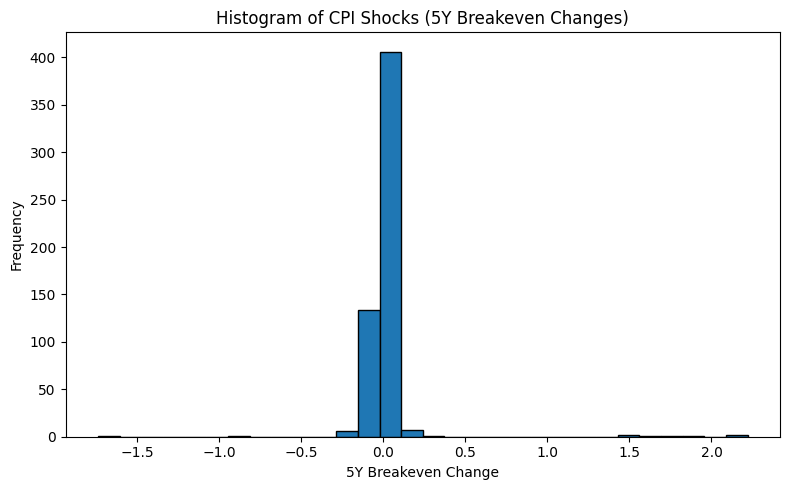

In [29]:
plt.figure(figsize=(8, 5))
plt.hist(event_occ["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

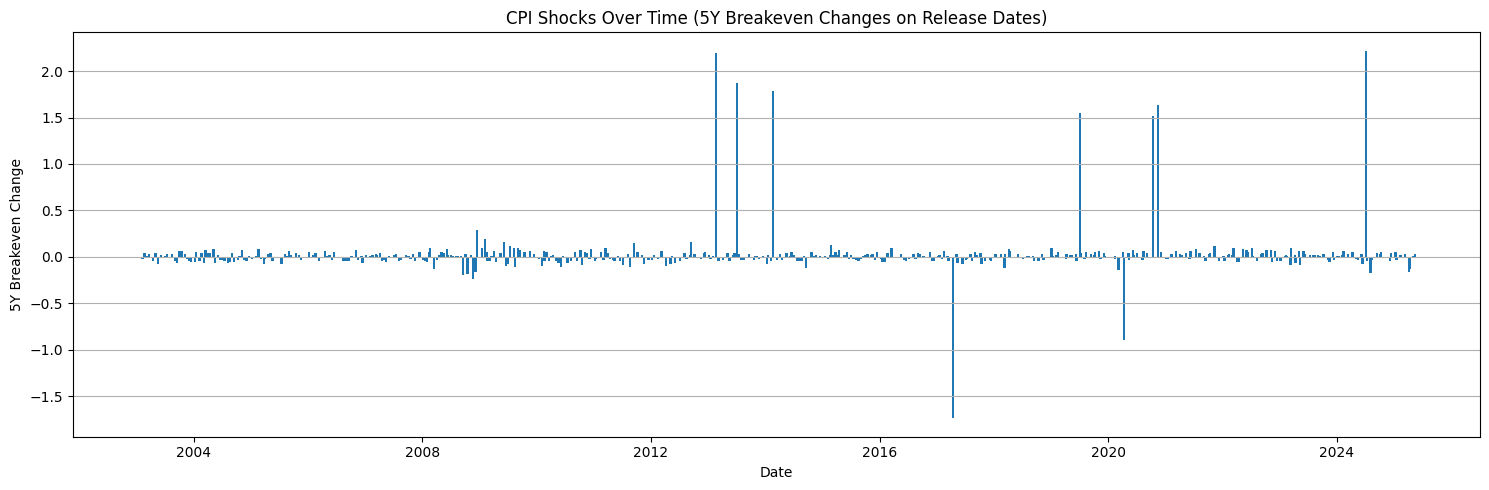

In [30]:
plt.figure(figsize=(15, 5))
plt.bar(event_occ.index, event_occ["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("CPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [31]:
nonevent_data = event_data.loc[(event_data["Event Release Date"] == False)]
nonevent_data

5Y_Breakeven  CPI Release Date  5Y_Breakeven_change  \
Date                                                             
2003-01-03         1.28             False                -0.02   
2003-01-06         1.31             False                 0.03   
2003-01-07         1.28             False                -0.03   
2003-01-08         1.33             False                 0.05   
2003-01-09         1.41             False                 0.08   
...                 ...               ...                  ...   
2025-05-09         2.39             False                 0.00   
2025-05-12         2.35             False                -0.04   
2025-05-14         2.44             False                 0.06   
2025-05-15         2.41             False                -0.03   
2025-05-16         2.42             False                 0.01   

            UNR Release Date  Event Release Date  
Date                                              
2003-01-03             False               False  
2003-01-06             False               False  
2003-01-07             False               False  
2003-01-08             False               False  
2003-01-09             False               False  
...                      ...                 ...  
2025-05-09             False               False  
2025-05-12             False               False  
2025-05-14             False               False  
2025-05-15             False               False  
2025-05-16             False               False  

[5273 rows x 5 columns]

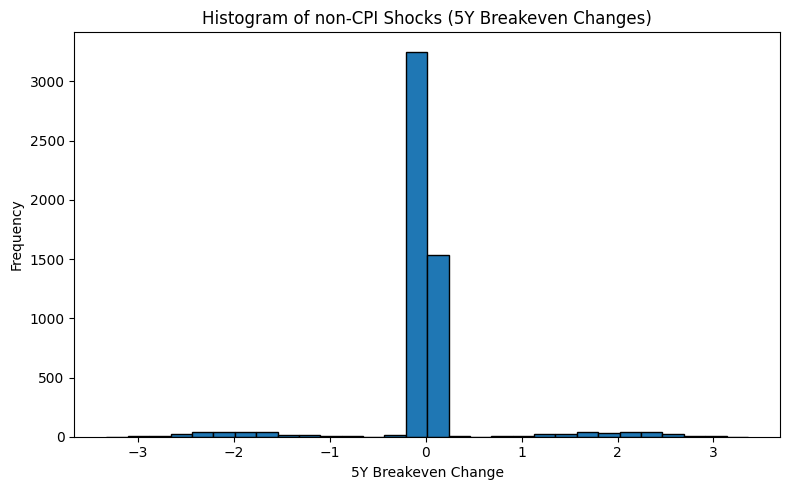

In [32]:
plt.figure(figsize=(8, 5))
plt.hist(nonevent_data["5Y_Breakeven_change"], bins=30, edgecolor='black')
plt.title("Histogram of non-CPI Shocks (5Y Breakeven Changes)")
plt.xlabel("5Y Breakeven Change")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

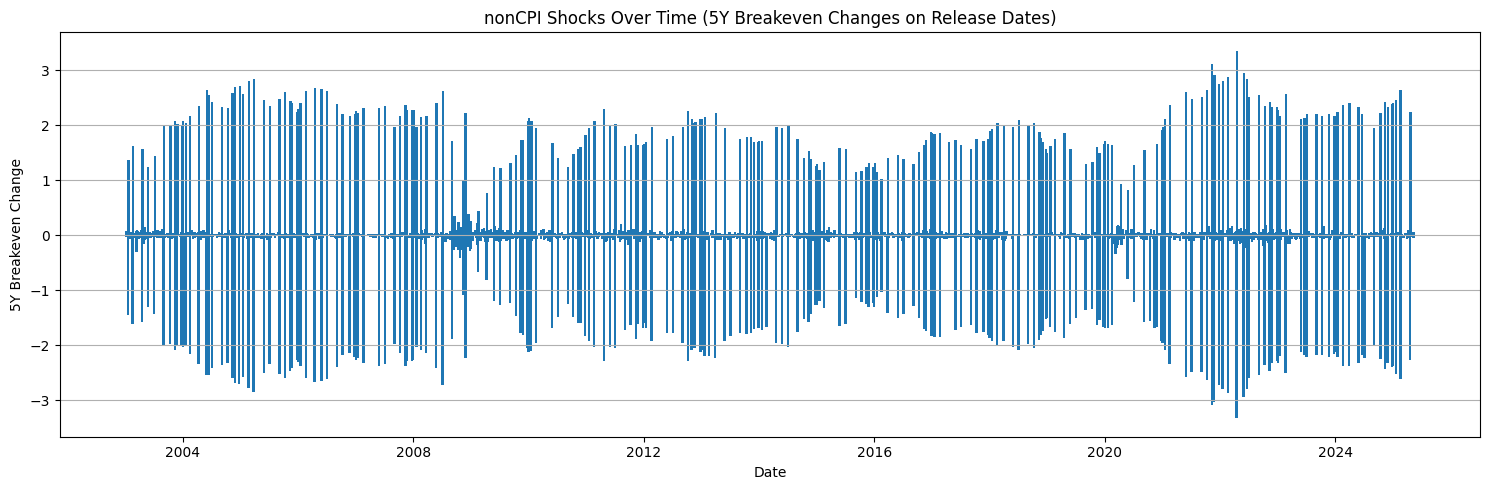

In [33]:
plt.figure(figsize=(15, 5))
plt.bar(nonevent_data.index, nonevent_data["5Y_Breakeven_change"], width=15)  # Width in days
plt.title("nonCPI Shocks Over Time (5Y Breakeven Changes on Release Dates)")
plt.xlabel("Date")
plt.ylabel("5Y Breakeven Change")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [34]:
tickers = pd.read_csv("data/SPY_IWM.csv")
tickers = tickers.rename(columns={"Price":"Date", "Close":"IWM Close", "Close.1":"SPY Close"}).iloc[2:][['Date', 'IWM Close', 'SPY Close']].set_index("Date")
tickers = tickers.dropna().astype(float)

In [35]:
tickers["SPY returns"] = tickers["SPY Close"].pct_change()
tickers["IWM returns"] = tickers["IWM Close"].pct_change()
tickers.head()

IWM Close  SPY Close  SPY returns  IWM returns
Date                                                      
2000-05-26  33.020184  87.911804          NaN          NaN
2000-05-30  34.238968  90.778534     0.032609     0.036910
2000-05-31  34.363113  90.977615     0.002193     0.003626
2000-06-01  35.141785  92.570145     0.017505     0.022660
2000-06-02  36.969967  94.182655     0.017419     0.052023

In [36]:
tickers["spread"] = tickers["SPY returns"] - tickers["IWM returns"]
tickers.head()

IWM Close  SPY Close  SPY returns  IWM returns    spread
Date                                                                
2000-05-26  33.020184  87.911804          NaN          NaN       NaN
2000-05-30  34.238968  90.778534     0.032609     0.036910 -0.004301
2000-05-31  34.363113  90.977615     0.002193     0.003626 -0.001433
2000-06-01  35.141785  92.570145     0.017505     0.022660 -0.005155
2000-06-02  36.969967  94.182655     0.017419     0.052023 -0.034604

In [37]:
infl_df = pd.read_csv("data/T5YIE.csv")
yld5_df = pd.read_csv("data/DGS5.csv")

In [38]:
yr5_df = pd.merge(infl_df, yld5_df, left_on="observation_date", right_on="observation_date").rename(columns={"observation_date":"Date"}).set_index("Date")

In [39]:
yr5_df['T5YIE diff'] = yr5_df['T5YIE'].diff()
yr5_df['DGS5 diff'] = yr5_df['DGS5'].diff()

In [40]:
comb_df = pd.merge(tickers, yr5_df, left_index=True, right_index=True).dropna()

In [41]:
comb_df.head()

IWM Close  SPY Close  SPY returns  IWM returns    spread  T5YIE  \
Date                                                                          
2003-01-03  28.993994  60.348682     0.003074    -0.001668  0.004742   1.28   
2003-01-06  29.333246  61.412285     0.017624     0.011701  0.005924   1.31   
2003-01-07  29.180405  61.260349    -0.002474    -0.005211  0.002736   1.28   
2003-01-08  28.889595  60.375107    -0.014450    -0.009966 -0.004485   1.33   
2003-01-09  29.314598  61.313217     0.015538     0.014711  0.000827   1.41   

            DGS5  T5YIE diff  DGS5 diff  
Date                                     
2003-01-03  3.03       -0.02      -0.02  
2003-01-06  3.10        0.03       0.07  
2003-01-07  3.04       -0.03      -0.06  
2003-01-08  3.01        0.05      -0.03  
2003-01-09  3.23        0.08       0.22

In [42]:
adj_comb_df = comb_df.loc['2020-01-01':]

In [43]:
adj_comb_df.head()

IWM Close   SPY Close  SPY returns  IWM returns    spread  T5YIE  \
Date                                                                            
2020-01-03  154.478455  298.017731    -0.007572    -0.003921 -0.003651   1.69   
2020-01-06  154.684280  299.154663     0.003815     0.001332  0.002483   1.69   
2020-01-07  154.169754  298.313477    -0.002812    -0.003326  0.000514   1.67   
2020-01-08  154.646866  299.903351     0.005330     0.003095  0.002235   1.68   
2020-01-09  154.833954  301.936920     0.006781     0.001210  0.005571   1.67   

            DGS5  T5YIE diff  DGS5 diff  
Date                                     
2020-01-03  1.59       -0.03      -0.08  
2020-01-06  1.61        0.00       0.02  
2020-01-07  1.62       -0.02       0.01  
2020-01-08  1.67        0.01       0.05  
2020-01-09  1.65       -0.01      -0.02

In [44]:
def graph_indicator_quantiles(data_df, indicator_cols, thresold=0.025, date_cutoff="2020-01-01"):
    res_df = data_df.loc[date_cutoff:]

    for ind in indicator_cols:
        s = res_df[ind]

        lower = s.quantile(thresold)
        upper = s.quantile(1 - thresold)

        # 2) plot the histogram
        plt.figure()
        plt.hist(s, bins=30, edgecolor='black')

        # 3) add vertical lines at the cutoffs
        plt.axvline(lower, linestyle='--', linewidth=2)
        plt.axvline(upper, linestyle='--', linewidth=2)

        plt.title(f"Histogram of {ind} with 2.5%–97.5% thresholds")
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.show()


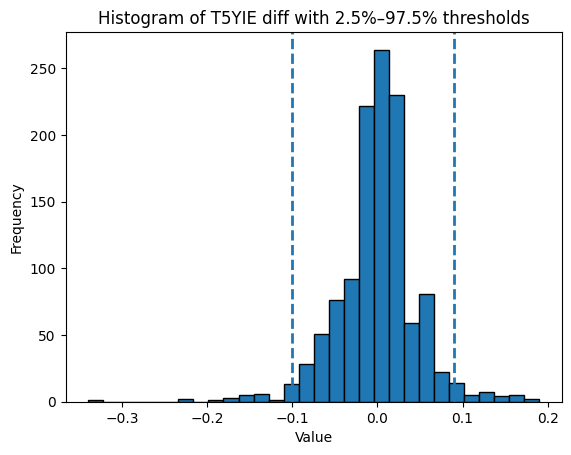

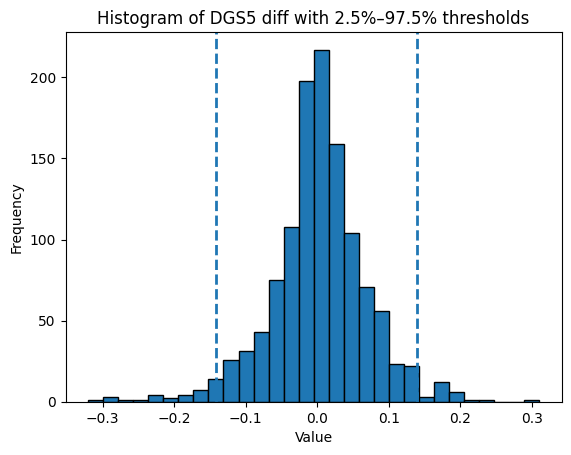

In [45]:
graph_indicator_quantiles(comb_df, ['T5YIE diff', 'DGS5 diff'])

In [49]:
def backtest_output(base_data_df,
                    ind_cols,
                    ret_cols,
                    min_date="2020-01-01",
                    threshold=0.025,
                    lag_cols=[0, 1, 2],
                    intercept=False):
    """
    Runs, for each lag, indicator, and return:
      • threshold quantiles of indicator
      • OLS of ret_{t+lag} ~ α + β ind_t
      • stats: beta, alpha, p-value, R², % sign match
      • strategy returns series: long if ŕhat≥0, short otherwise
      • plots per-period strat_ret and cumulative P&L
    Returns a summary DataFrame of the stats.
    """
    data = base_data_df.loc[min_date:].copy()
    rows = []

    for lag in lag_cols:
        for ind in ind_cols:
            s = data[ind].dropna()
            lower_q = s.quantile(threshold)
            upper_q = s.quantile(1 - threshold)

            for ret in ret_cols:
                # future return series
                y = data[ret].shift(-lag)

                # align and drop NaNs
                df = pd.concat([s, y], axis=1).dropna()
                df.columns = ['ind', 'ret']

                # design matrix
                X = df[['ind']]
                if intercept:
                    X = sm.add_constant(X)

                # fit OLS
                model = sm.OLS(df['ret'], X).fit()
                beta  = model.params['ind']
                alpha = model.params.get('const', 0.0)

                # how often sign(ind) == sign(ret)
                pct_sign_match = (np.sign(df['ind']) == np.sign(df['ret'])).mean()

                # predicted returns & strategy P/L
                y_hat     = model.predict(X)
                pos       = np.where(y_hat >= 0, 1, -1)
                strat_ret = pd.Series(pos * df['ret'].values, index=df.index)

                # compute summary stats
                mean_strat = strat_ret.mean()
                cum_strat  = strat_ret.sum() # no trade size changes
                strat_std = strat_ret.std()
                sharpe = mean_strat / strat_std * np.sqrt(len(strat_ret))

                rows.append({
                    'lag': lag,
                    'indicator': ind,
                    'return': ret,
                    'lower_threshold': lower_q,
                    'upper_threshold': upper_q,
                    'beta': beta,
                    'intercept': alpha,
                    'p_value': model.pvalues['ind'],
                    'r_squared': model.rsquared,
                    'pct_sign_match': pct_sign_match,
                    'mean_strat_return': mean_strat,
                    'cum_strat_return': cum_strat,
                    'sharpe': sharpe
                })

                # ——— PLOTS ———
                # 1) per-period strategy returns
                plt.figure(figsize=(10, 3))
                plt.plot(strat_ret.index, strat_ret, label='Strategy Ret')
                plt.axhline(0, color='gray', linewidth=1)
                plt.title(f"Strat Ret (lag={lag}, ind={ind}, ret={ret})")
                plt.ylabel("Return")
                plt.legend()
                plt.show()

                # 2) cumulative performance
                cum = (1 + strat_ret).cumprod() - 1
                plt.figure(figsize=(10, 3))
                plt.plot(cum.index, cum, label='Cumulative P&L')
                plt.title(f"Cumulative Strat P&L (lag={lag}, ind={ind}, ret={ret})")
                plt.ylabel("Cumulative Return")
                plt.legend()
                plt.show()

    return pd.DataFrame(rows)


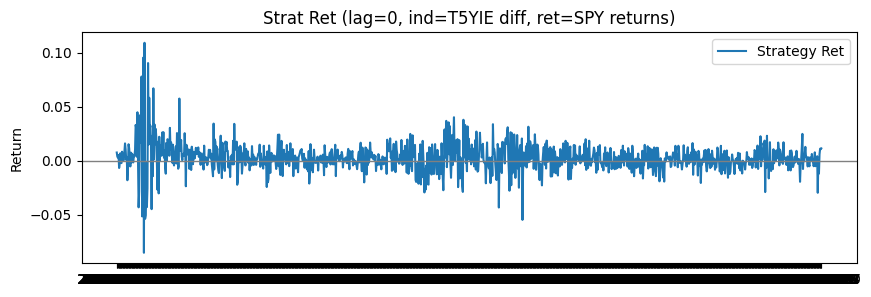

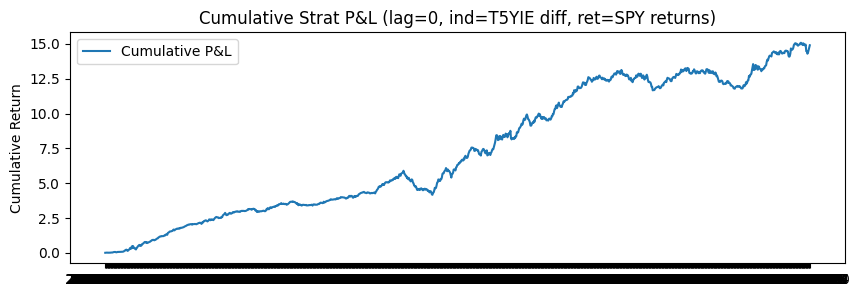

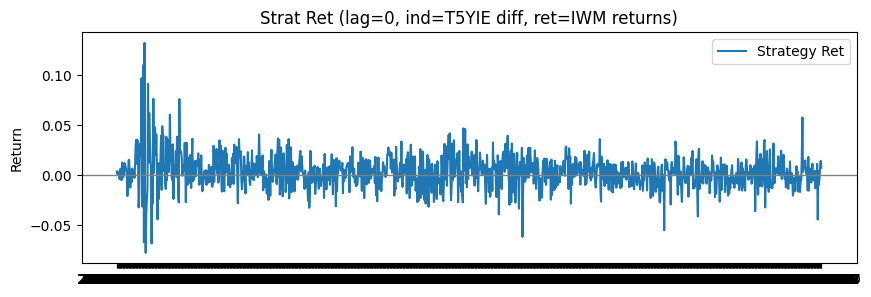

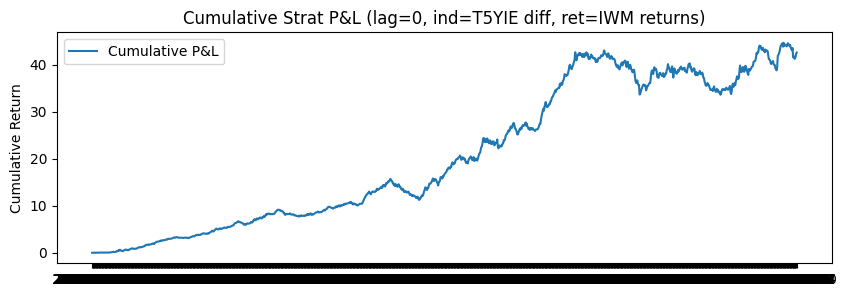

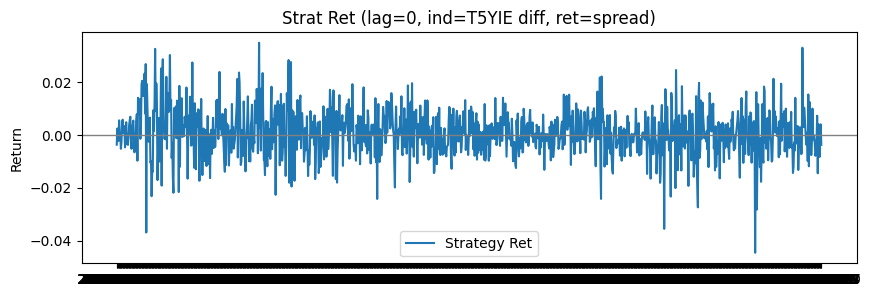

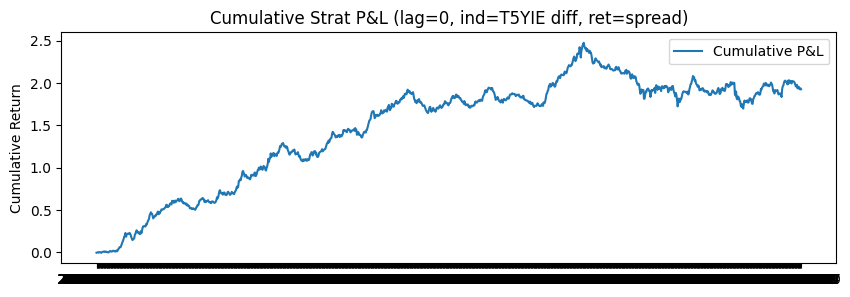

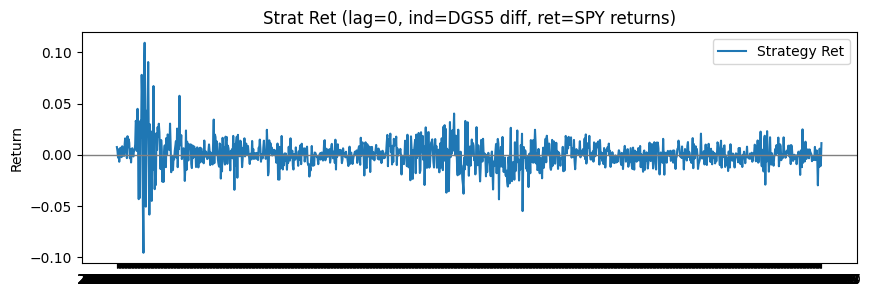

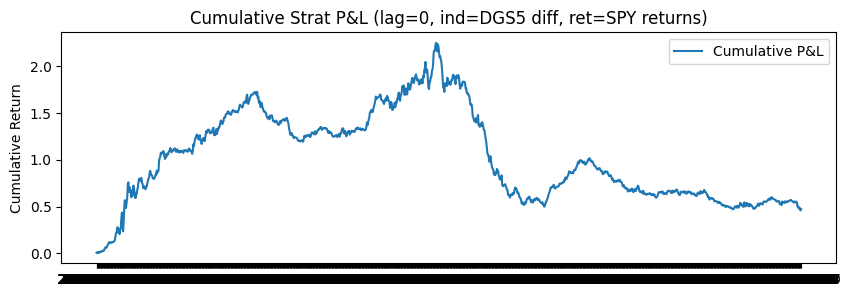

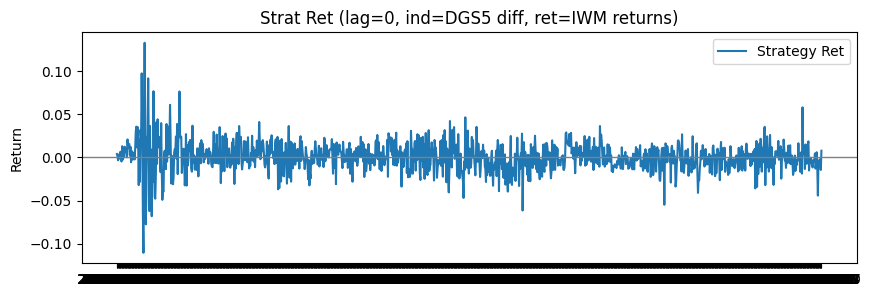

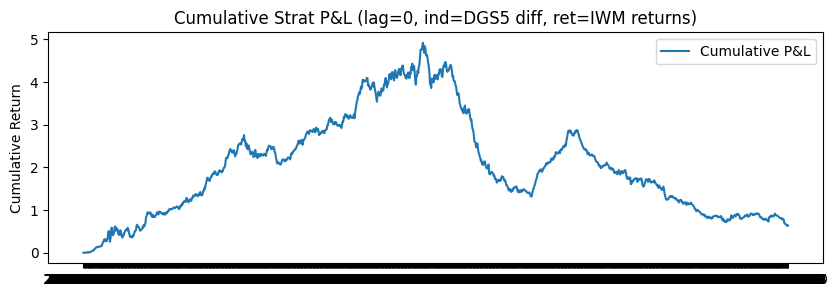

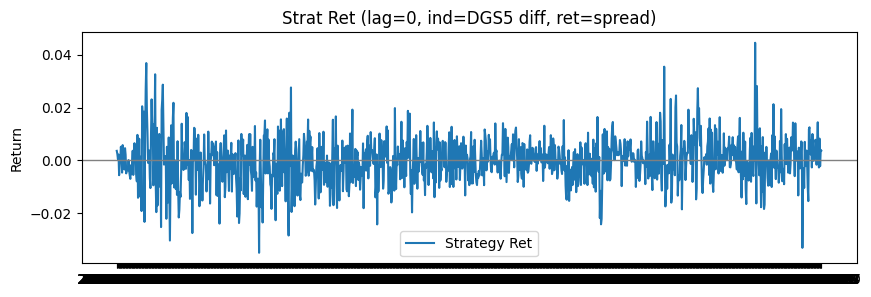

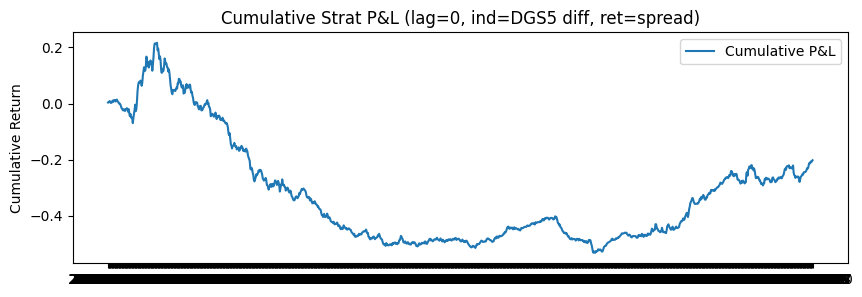

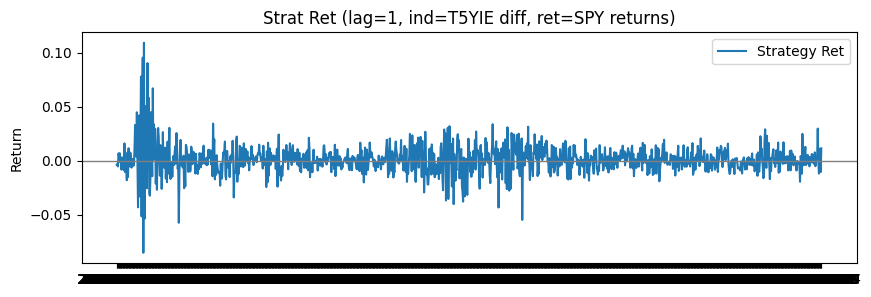

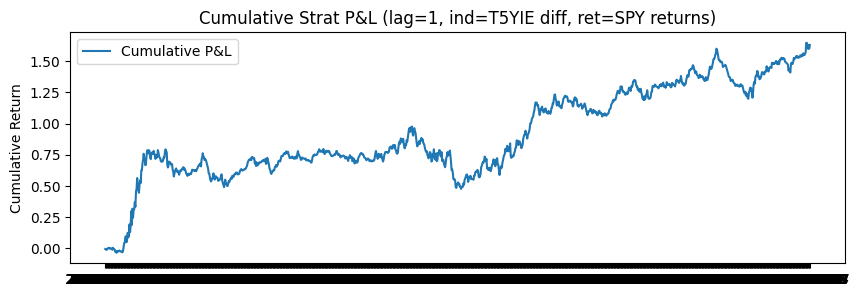

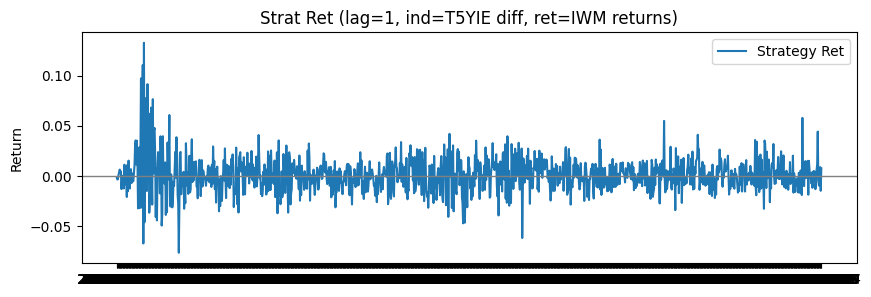

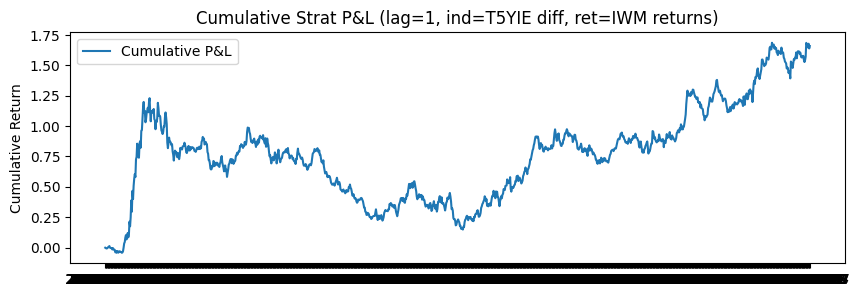

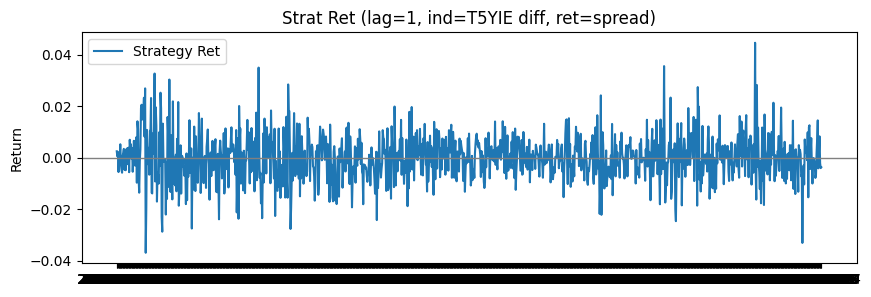

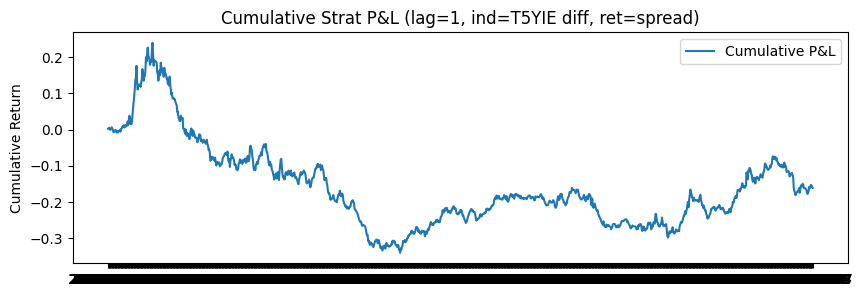

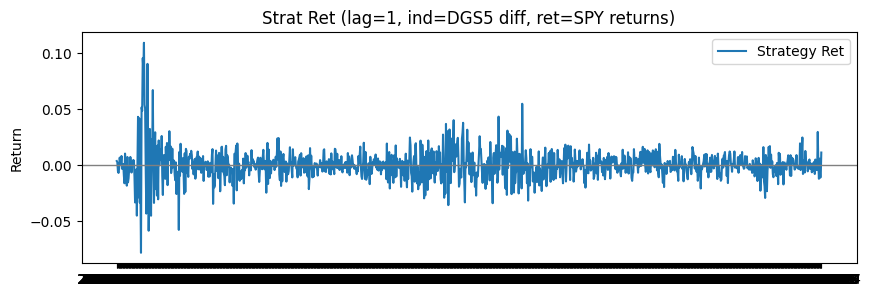

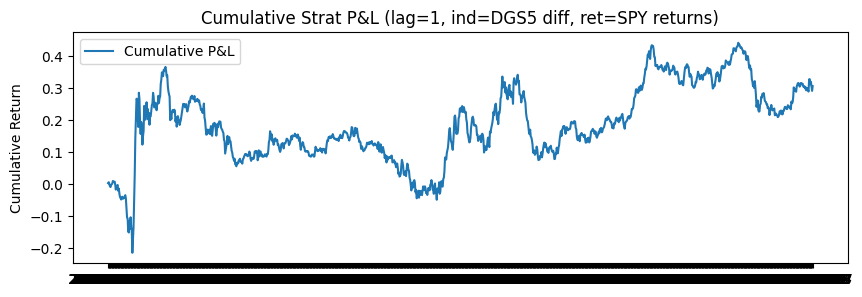

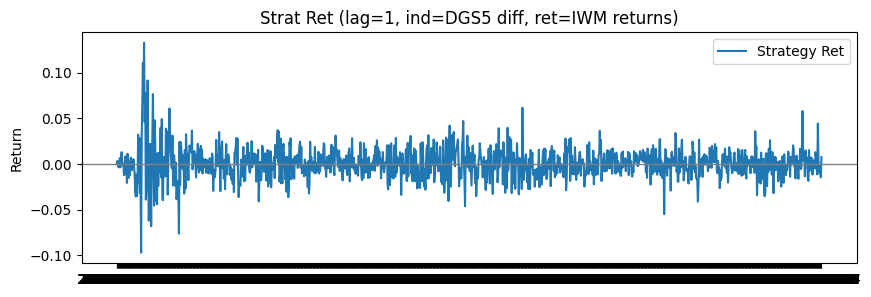

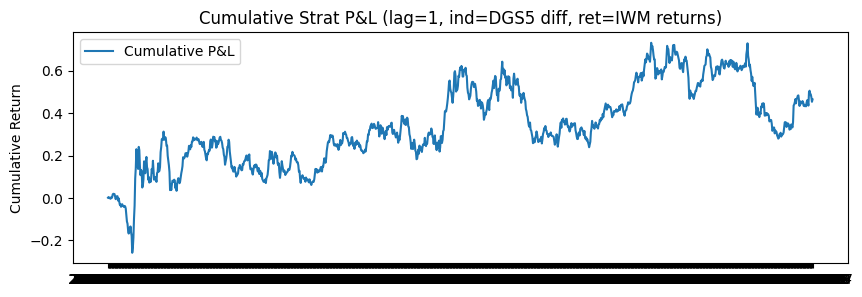

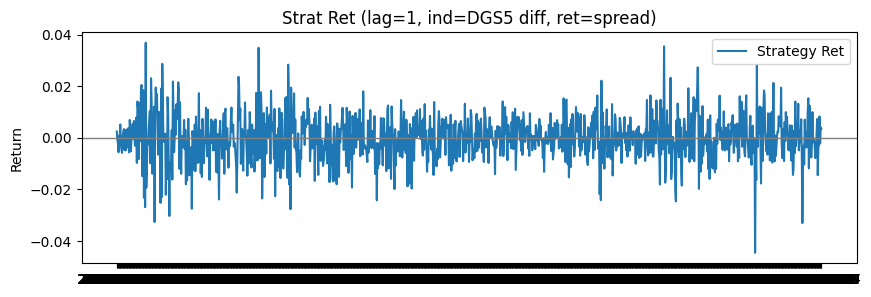

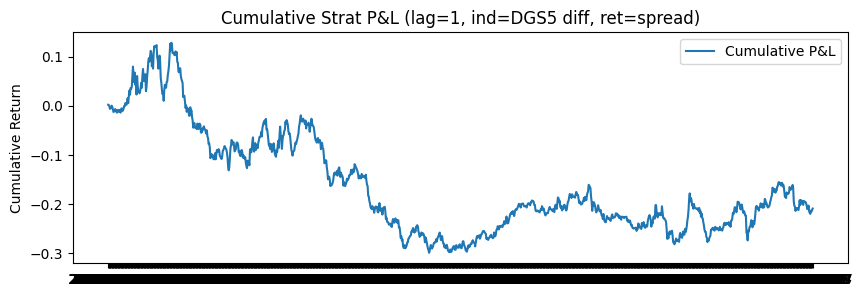

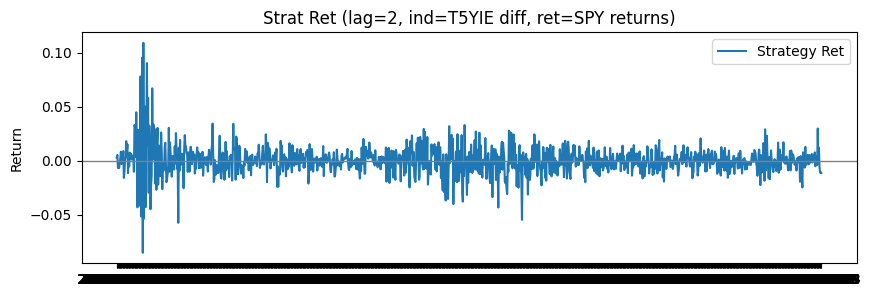

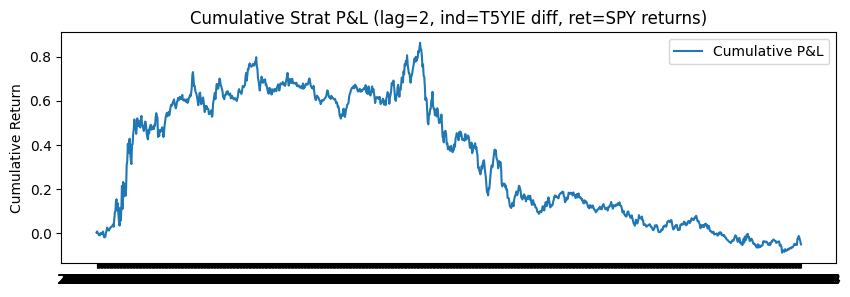

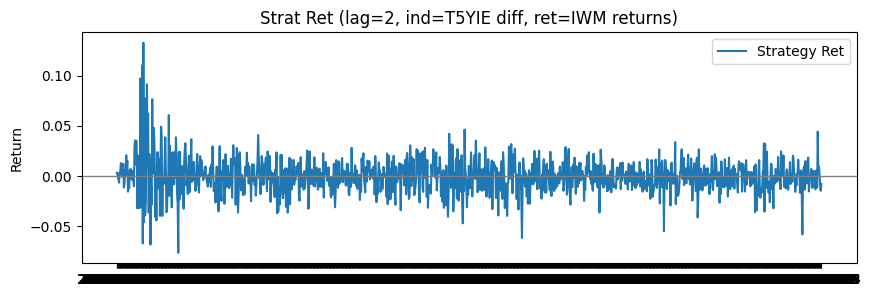

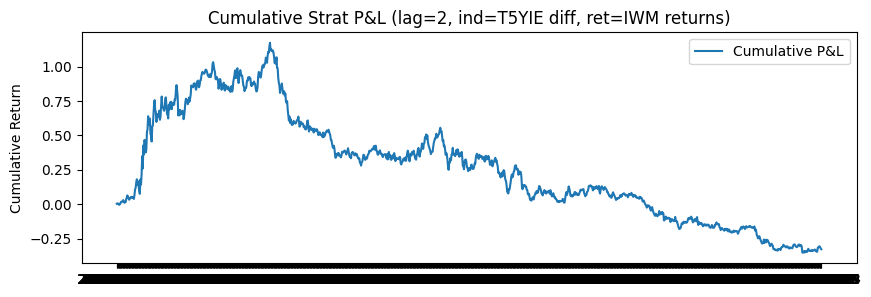

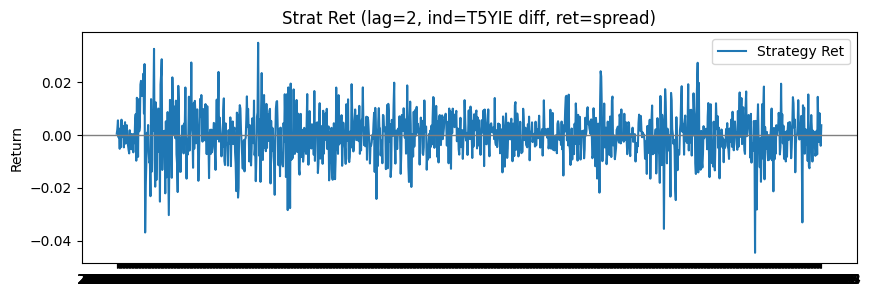

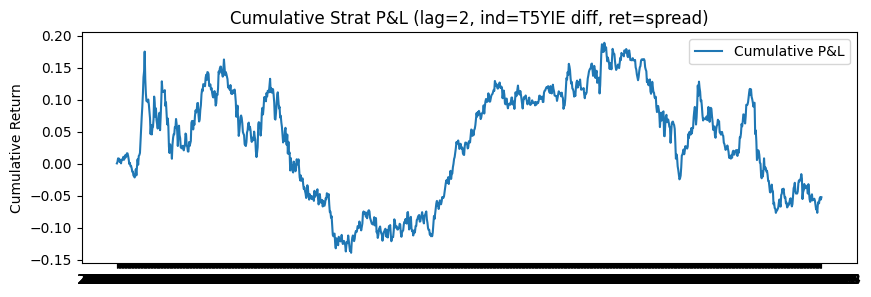

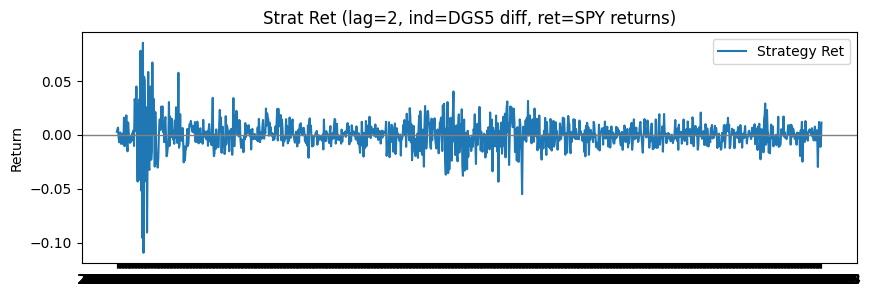

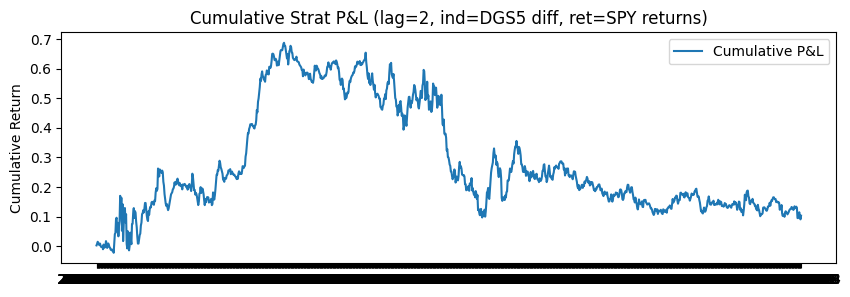

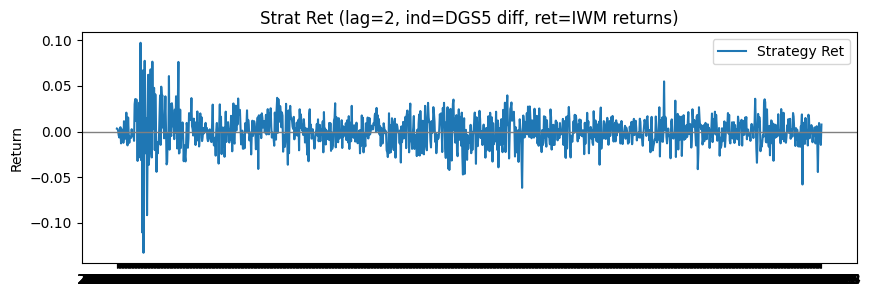

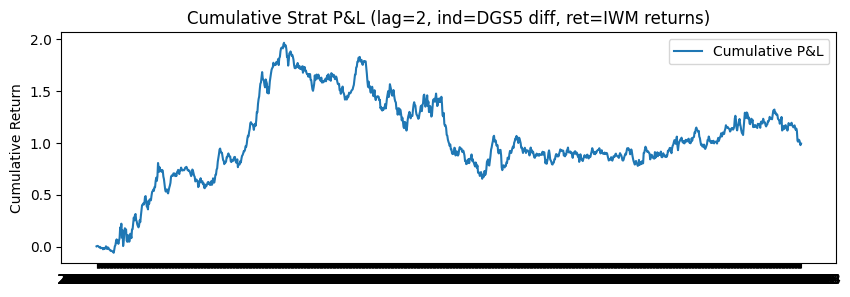

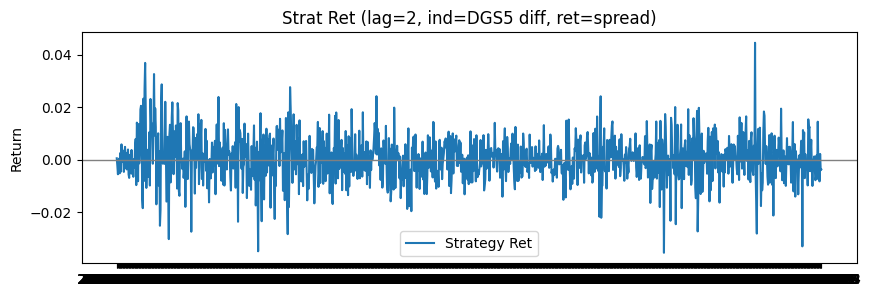

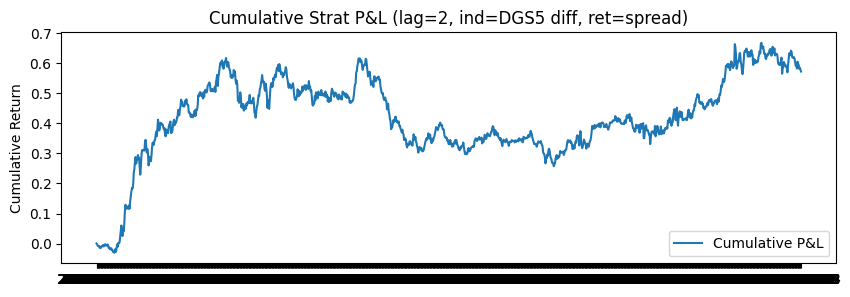

lag   indicator       return  lower_threshold  upper_threshold      beta  \
0     0  T5YIE diff  SPY returns         -0.10000             0.09  0.075758   
1     0  T5YIE diff  IWM returns         -0.10000             0.09  0.103892   
2     0  T5YIE diff       spread         -0.10000             0.09 -0.028134   
3     0   DGS5 diff  SPY returns         -0.14175             0.14  0.006150   
4     0   DGS5 diff  IWM returns         -0.14175             0.14  0.001460   
5     0   DGS5 diff       spread         -0.14175             0.14  0.004689   
6     1  T5YIE diff  SPY returns         -0.10000             0.09  0.007779   
7     1  T5YIE diff  IWM returns         -0.10000             0.09  0.014744   
8     1  T5YIE diff       spread         -0.10000             0.09 -0.006965   
9     1   DGS5 diff  SPY returns         -0.14175             0.14 -0.010861   
10    1   DGS5 diff  IWM returns         -0.14175             0.14 -0.010335   
11    1   DGS5 diff       spread         -0.14175             0.14 -0.000526   
12    2  T5YIE diff  SPY returns         -0.10000             0.09  0.025682   
13    2  T5YIE diff  IWM returns         -0.10000             0.09  0.031237   
14    2  T5YIE diff       spread         -0.10000             0.09 -0.005555   
15    2   DGS5 diff  SPY returns         -0.14175             0.14  0.004336   
16    2   DGS5 diff  IWM returns         -0.14175             0.14  0.010122   
17    2   DGS5 diff       spread         -0.14175             0.14 -0.005786   

    intercept       p_value  r_squared  pct_sign_match  mean_strat_return  \
0         0.0  1.167721e-20   0.070245        0.522613           0.002406   
1         0.0  6.463475e-23   0.078228        0.532663           0.003312   
2         0.0  2.138189e-07   0.022308        0.413735           0.000938   
3         0.0  2.923418e-01   0.000929        0.458124           0.000415   
4         0.0  8.474540e-01   0.000031        0.477387           0.000565   
5         0.0  2.230129e-01   0.001244        0.438861          -0.000150   
6         0.0  3.474683e-01   0.000741        0.464376           0.000900   
7         0.0  1.705456e-01   0.001575        0.457670           0.000970   
8         0.0  2.017193e-01   0.001367        0.450126          -0.000108   
9         0.0  6.303155e-02   0.002896        0.455155           0.000313   
10        0.0  1.736251e-01   0.001553        0.450964           0.000471   
11        0.0  8.914577e-01   0.000016        0.459346          -0.000158   
12        0.0  1.894686e-03   0.008072        0.442114           0.000046   
13        0.0  3.658138e-03   0.007070        0.450503          -0.000182   
14        0.0  3.088203e-01   0.000870        0.440436          -0.000006   
15        0.0  4.584984e-01   0.000462        0.439597           0.000173   
16        0.0  1.828951e-01   0.001489        0.459732           0.000732   
17        0.0  1.331841e-01   0.001892        0.429530           0.000419   

    cum_strat_return    sharpe  
0           2.872653  6.299267  
1           3.954842  6.687153  
2           1.120413  3.688595  
3           0.495785  1.070048  
4           0.674681  1.120594  
5          -0.178896 -0.585712  
6           1.073418  2.321174  
7           1.157229  1.924080  
8          -0.128908 -0.422049  
9           0.373840  0.806797  
10          0.561929  0.933192  
11         -0.188089 -0.615863  
12          0.054459  0.117502  
13         -0.216482 -0.359398  
14         -0.007179 -0.023502  
15          0.206037  0.444585  
16          0.872683  1.450010  
17          0.499192  1.636142

In [50]:
backtest_output(comb_df, ['T5YIE diff', 'DGS5 diff'], ['SPY returns', 'IWM returns', 'spread'])

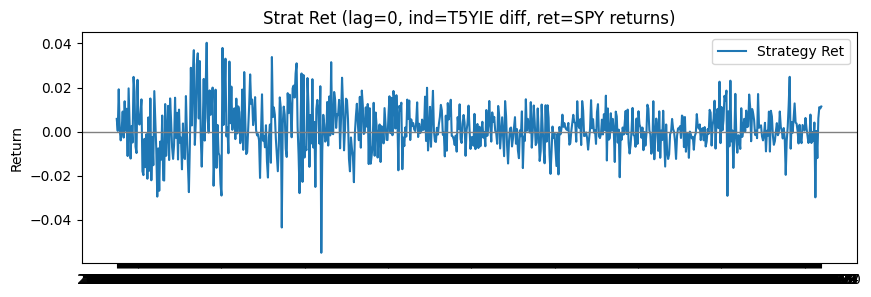

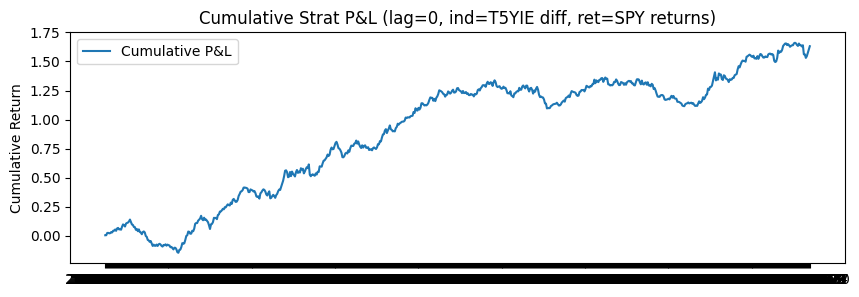

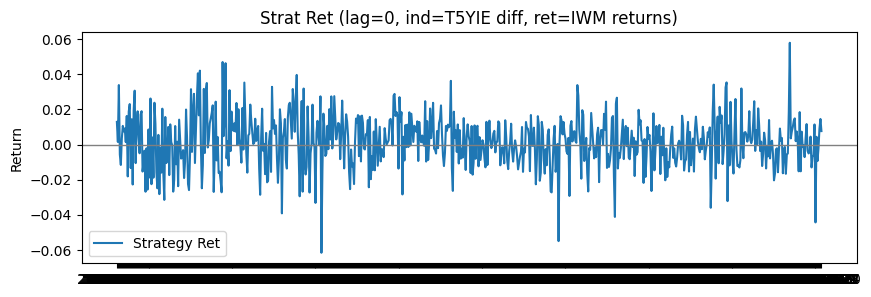

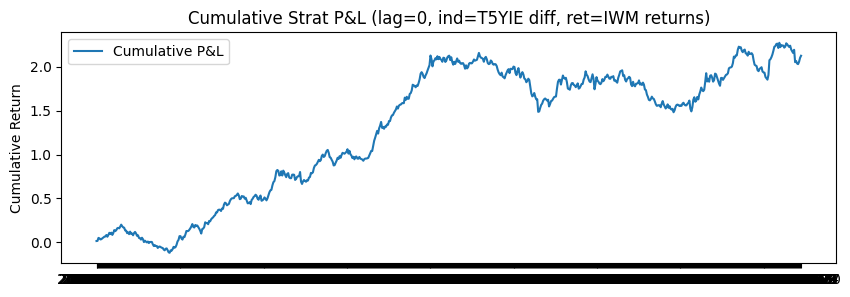

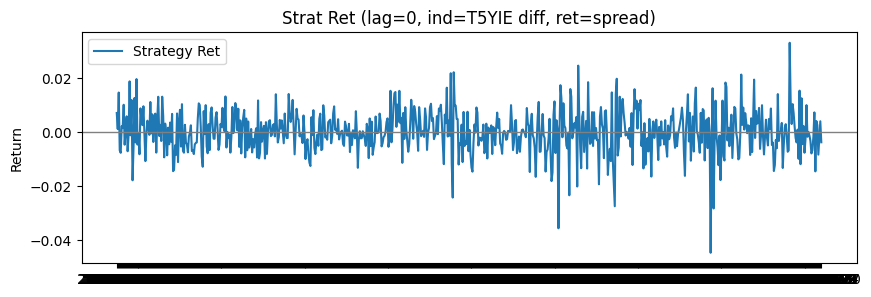

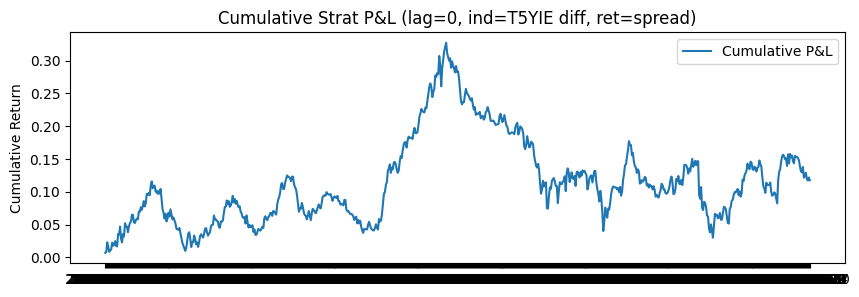

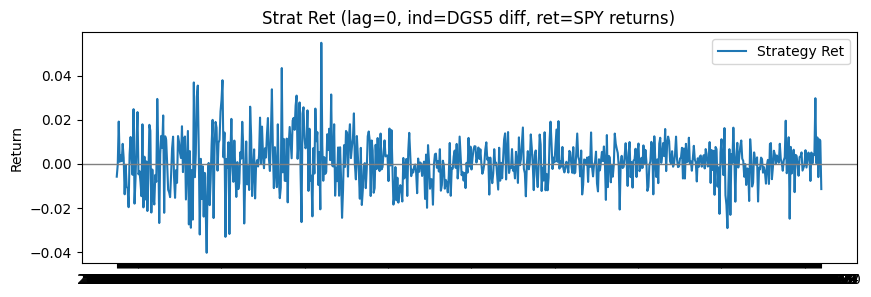

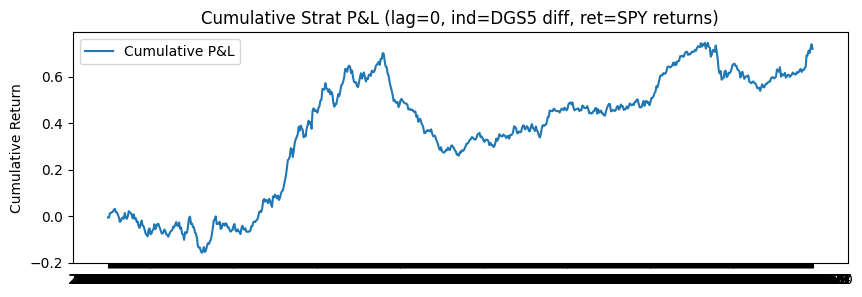

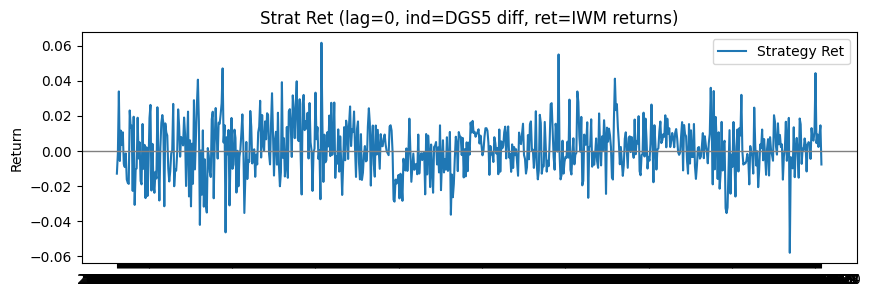

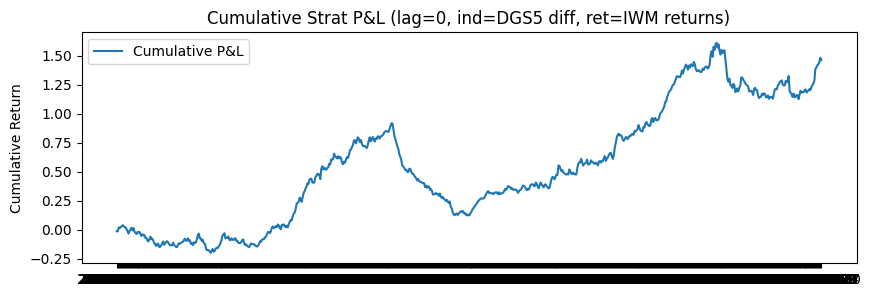

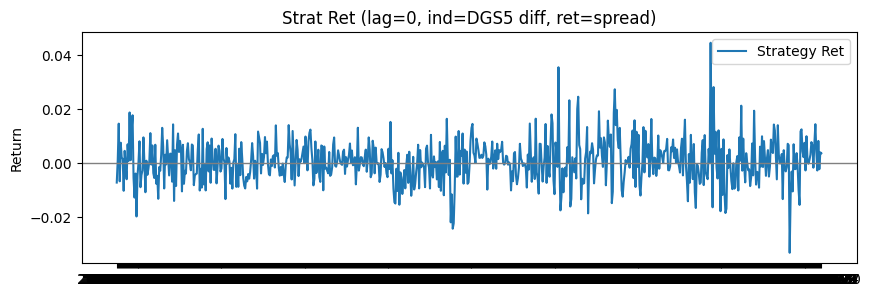

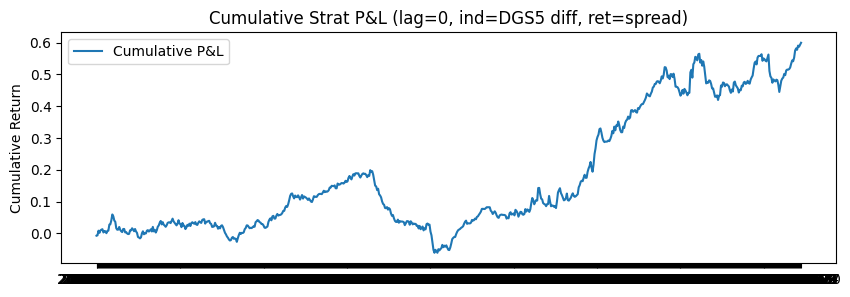

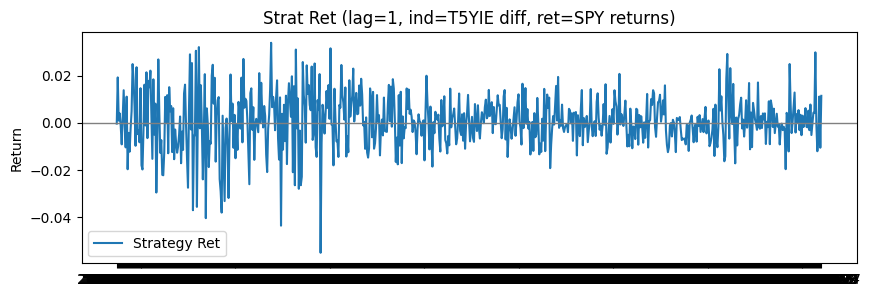

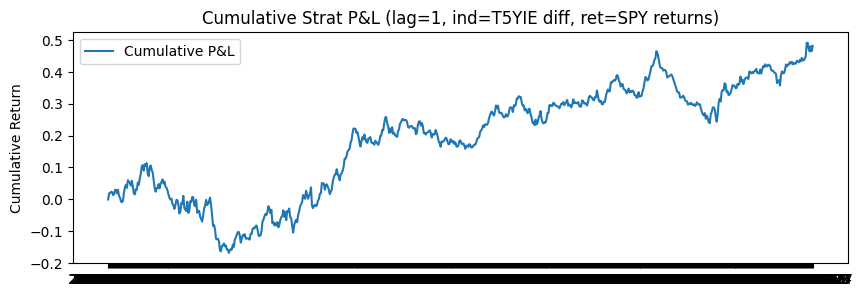

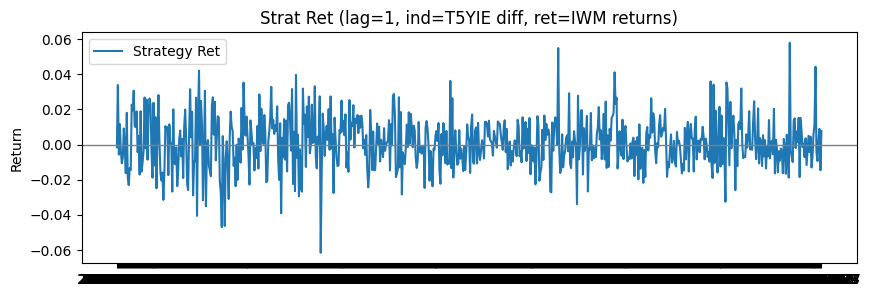

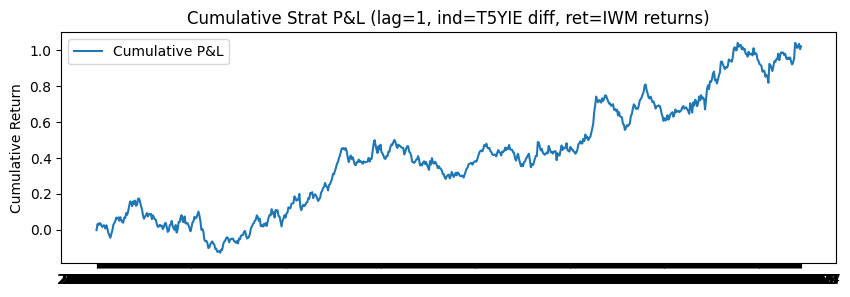

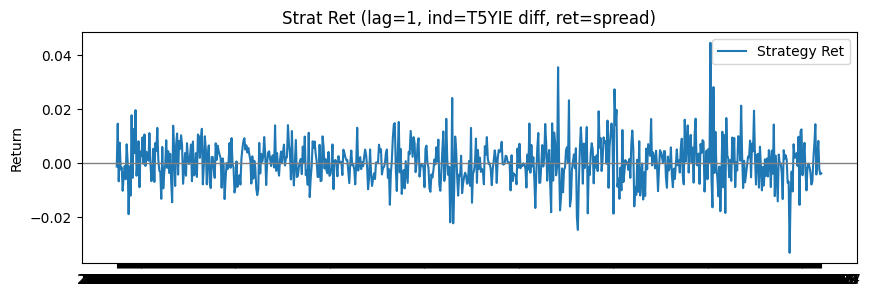

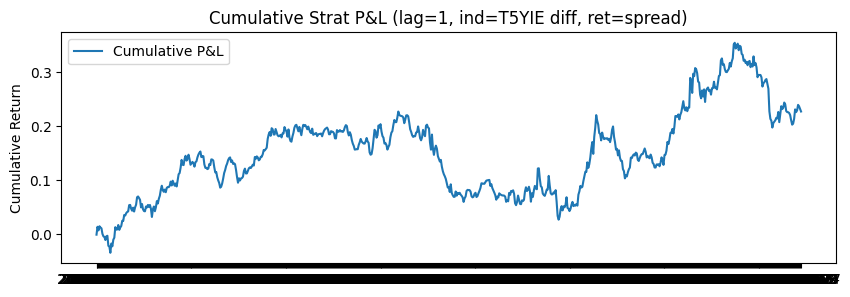

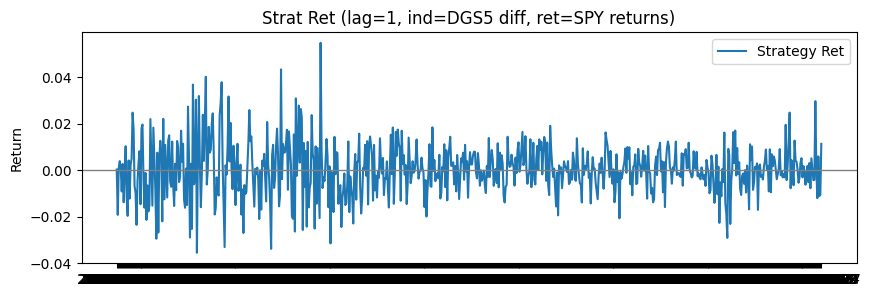

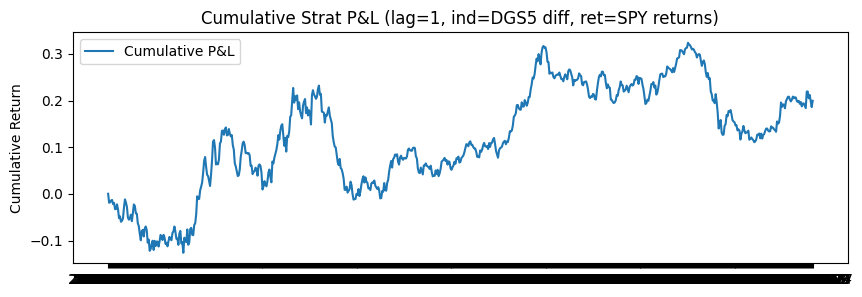

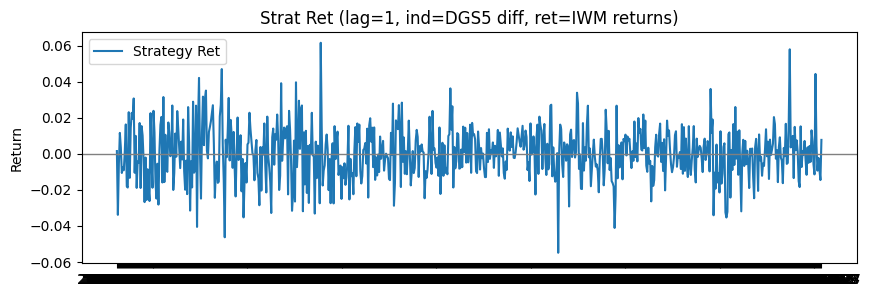

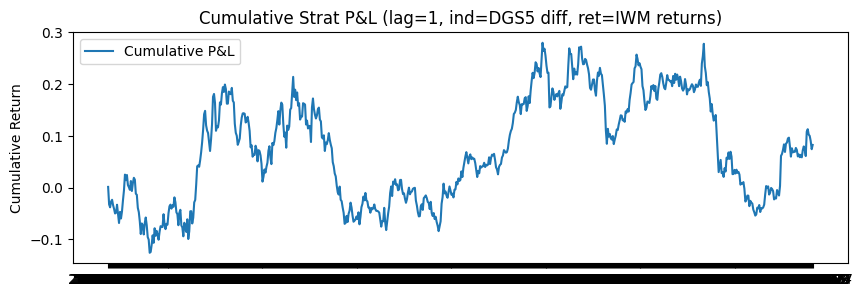

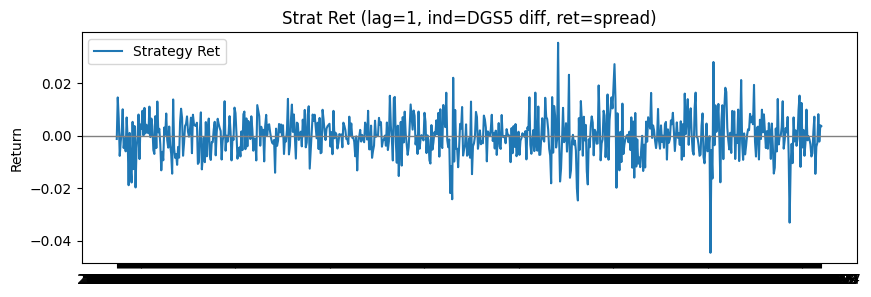

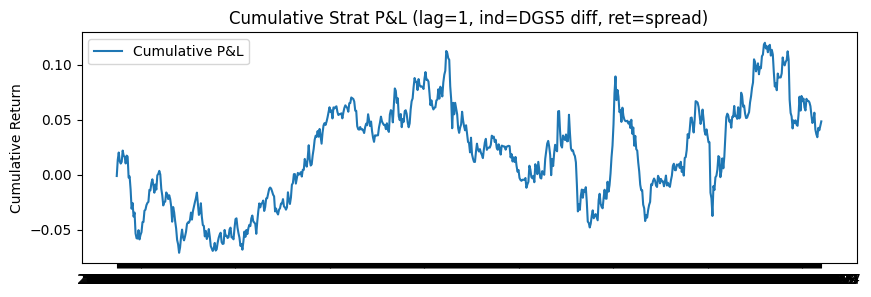

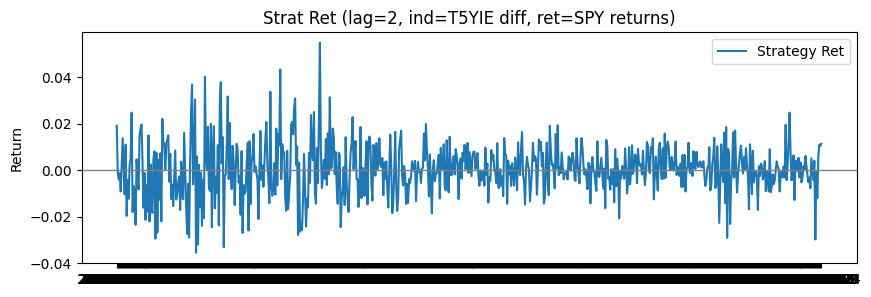

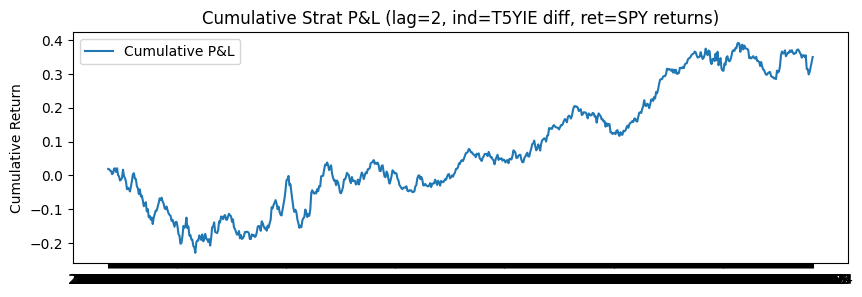

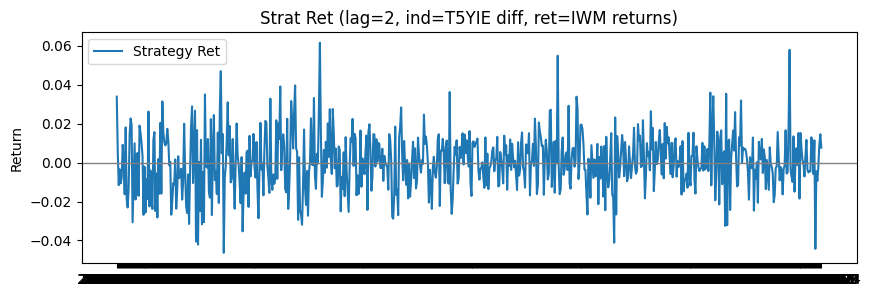

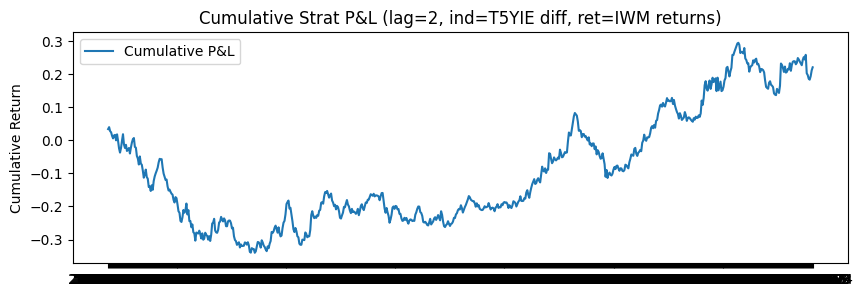

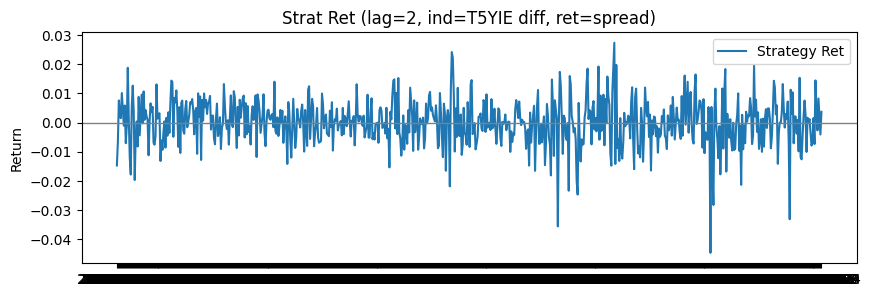

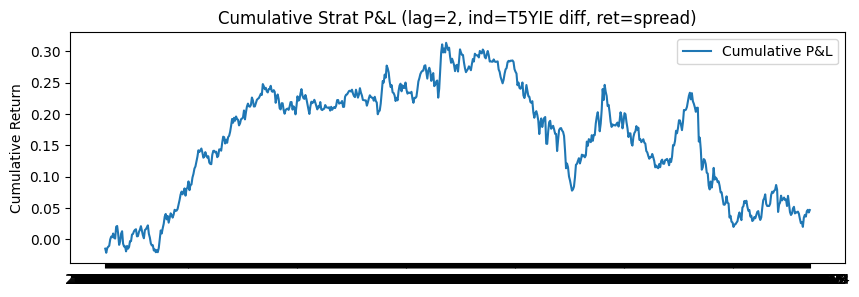

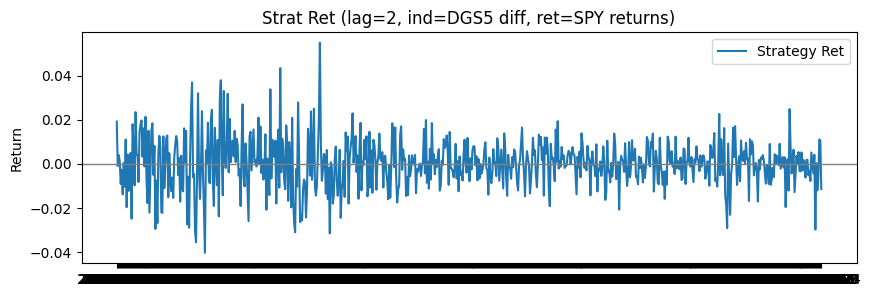

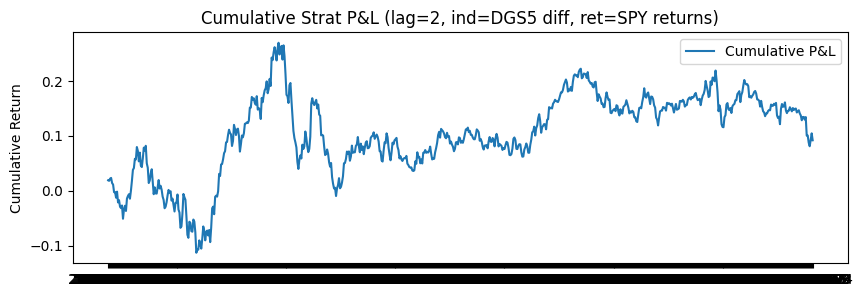

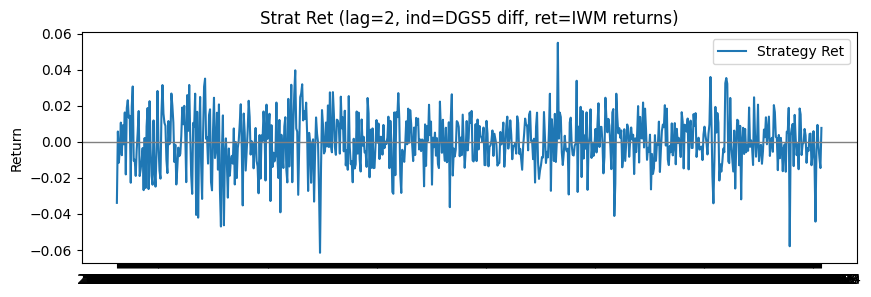

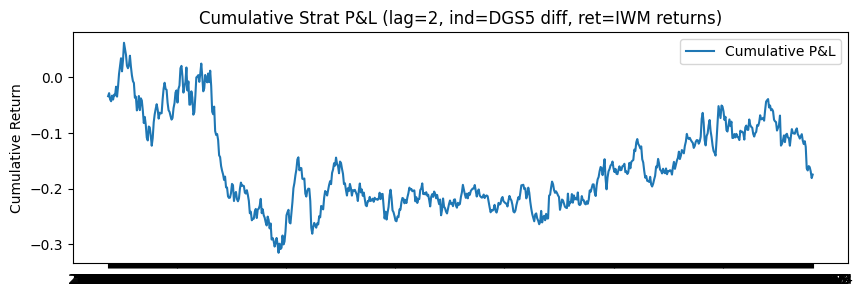

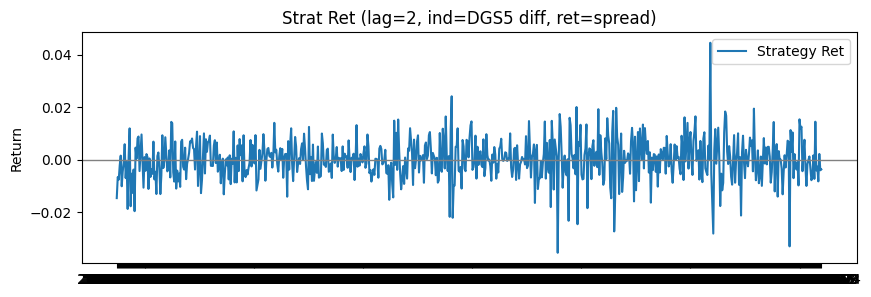

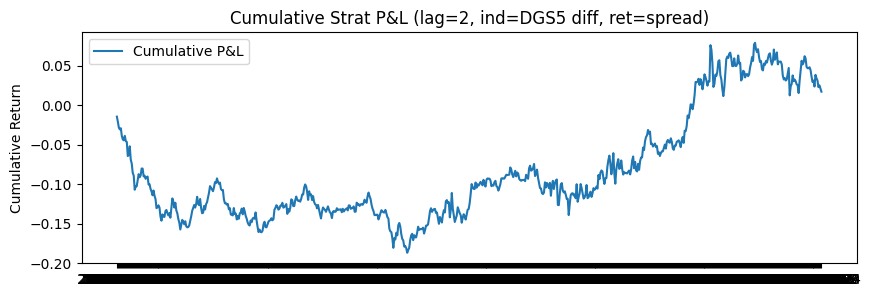

lag   indicator       return  lower_threshold  upper_threshold      beta  \
0     0  T5YIE diff  SPY returns         -0.09175           0.1000  0.041573   
1     0  T5YIE diff  IWM returns         -0.09175           0.1000  0.053342   
2     0  T5YIE diff       spread         -0.09175           0.1000 -0.011769   
3     0   DGS5 diff  SPY returns         -0.16175           0.1535 -0.015519   
4     0   DGS5 diff  IWM returns         -0.16175           0.1535 -0.025097   
5     0   DGS5 diff       spread         -0.16175           0.1535  0.009578   
6     1  T5YIE diff  SPY returns         -0.09175           0.1000  0.004836   
7     1  T5YIE diff  IWM returns         -0.09175           0.1000  0.008130   
8     1  T5YIE diff       spread         -0.09175           0.1000 -0.003295   
9     1   DGS5 diff  SPY returns         -0.16175           0.1535 -0.004282   
10    1   DGS5 diff  IWM returns         -0.16175           0.1535 -0.003263   
11    1   DGS5 diff       spread         -0.16175           0.1535 -0.001020   
12    2  T5YIE diff  SPY returns         -0.09175           0.1000 -0.002097   
13    2  T5YIE diff  IWM returns         -0.09175           0.1000 -0.000172   
14    2  T5YIE diff       spread         -0.09175           0.1000 -0.001926   
15    2   DGS5 diff  SPY returns         -0.16175           0.1535 -0.000717   
16    2   DGS5 diff  IWM returns         -0.16175           0.1535  0.000312   
17    2   DGS5 diff       spread         -0.16175           0.1535 -0.001029   

    intercept   p_value     r_squared  pct_sign_match  mean_strat_return  \
0         0.0  0.000003  3.060595e-02        0.491597           0.001417   
1         0.0  0.000005  2.881069e-02        0.505602           0.001705   
2         0.0  0.060277  4.941774e-03        0.459384           0.000187   
3         0.0  0.003172  1.214400e-02        0.438375           0.000822   
4         0.0  0.000302  1.816040e-02        0.431373           0.001371   
5         0.0  0.009793  9.320833e-03        0.501401           0.000688   
6         0.0  0.587279  4.139878e-04        0.465638           0.000614   
7         0.0  0.489966  6.696294e-04        0.471248           0.001095   
8         0.0  0.599488  3.875129e-04        0.444600           0.000318   
9         0.0  0.417425  9.237538e-04        0.458626           0.000317   
10        0.0  0.640296  3.068467e-04        0.469846           0.000220   
11        0.0  0.784023  1.055736e-04        0.474053           0.000097   
12        0.0  0.814043  7.786535e-05        0.429775           0.000484   
13        0.0  0.988379  2.985736e-07        0.448034           0.000389   
14        0.0  0.759094  1.323584e-04        0.438202           0.000095   
15        0.0  0.892096  2.589918e-05        0.450843           0.000186   
16        0.0  0.964362  2.809789e-06        0.471910          -0.000160   
17        0.0  0.782154  1.076076e-04        0.450843           0.000054   

    cum_strat_return    sharpe  
0           1.011682  3.420090  
1           1.217679  3.108382  
2           0.133281  0.634560  
3           0.586840  1.973161  
4           0.978917  2.492923  
5           0.491467  2.348278  
6           0.437779  1.470465  
7           0.780910  1.986610  
8           0.226728  1.080664  
9           0.226309  0.759309  
10          0.156873  0.398022  
11          0.069436  0.330710  
12          0.344695  1.157137  
13          0.276778  0.702420  
14          0.067917  0.323478  
15          0.132441  0.444247  
16         -0.114191 -0.289715  
17          0.038801  0.184795

In [51]:
backtest_output(comb_df, ['T5YIE diff', 'DGS5 diff'], ['SPY returns', 'IWM returns', 'spread'], min_date="2022-01-01")